Suppose we didn't know how many different species there we in the Iris dataset. How can we approximately infer this information from the data?

One possible solution would be to plot the data as a scatter plot and visually identify distinct groups. The Iris dataset, however, is comprised of four dimensions, so it can't be visualized except for pairs of features.

In order to visualize the complete dataset as a 2D scatterplot, it's possible to use **dimensionality reduction** techniques to reduce the data to two dimensions without losing too much structural information. 

## Reading data

In [1]:
import pandas as pd

iris = pd.read_csv('../datasets/iris_without_classes.csv')

In [2]:
iris.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Reducing dimensions

We'll use [scikit-learn's PCA](http://scikit-learn.org/0.17/modules/decomposition.html#pca) algorithm to reduce the number of dimensions to two in our dataset.

In [3]:
# Use PCA's fit_transform() method to reduce the dataset size to two dimensions
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # Create a PCA object with two components
iris_2d = pca.fit_transform(iris) # use fit_transform() to reduce the original dataset into two dimensions

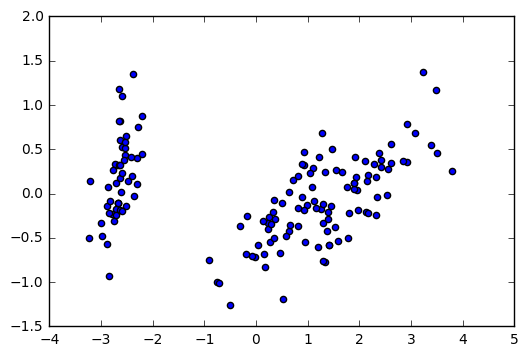

In [4]:
# Create a scatterplot of the reduced dataset
import matplotlib.pyplot as plt
%matplotlib inline

# Create a scatterplot of the two dimensions of the transformed data
plt.scatter(iris_2d[:, 0], iris_2d[:, 1])
# Show the scatterplot
plt.show()

How many distinct groups can you see?

## Finding clusters using K-Means

The presented above can be framed as a **Clustering** problem. Clustering involves finding groups of examples that are like other examples in the same group but different from examples that belong to other groups.

In this example, we'll use [scikit-learn's KMeans](http://scikit-learn.org/0.17/modules/clustering.html#k-means) algorithm to find clusters in our data.

One limitation of KMeans is that it receives the expected number of clusters as input, so you must either have some domain knowledge to guess a reasonable number of groups or attempt different values for the number of clusters and see which one works best.

In [5]:
# Create two KMeans models: one with two clusters and another with three clusters
# Store the labels predicted by the KMeans models using two and three clusters
from sklearn.cluster import KMeans

model2 = KMeans(n_clusters=2).fit(iris) # Create a KMeans model expecting two clusters
labels2 = model2.predict(iris) # Predict the cluster label for each data point using predict()

model3 = KMeans(n_clusters=3).fit(iris) # Create a KMeans model expecting three clusters
labels3 = model3.predict(iris) # Predict the cluster label for each data point using predict()

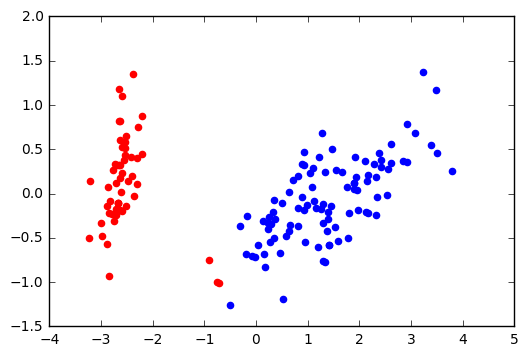

In [6]:
# Plot the 2-clusters assignments using the reduced dataset. Use different colors for each cluster
plt.scatter(iris_2d[labels2 == 0, 0], iris_2d[labels2 == 0, 1], color='red')
plt.scatter(iris_2d[labels2 == 1, 0], iris_2d[labels2 == 1, 1], color='blue')
# Show the scatterplot
plt.show()

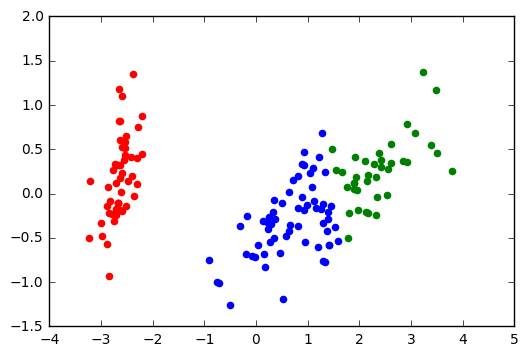

In [7]:
# Plot the 3-clusters assignments using the reduced dataset. Use different colors for each cluster
plt.scatter(iris_2d[labels3 == 0, 0], iris_2d[labels3 == 0, 1], color='red')
plt.scatter(iris_2d[labels3 == 1, 0], iris_2d[labels3 == 1, 1], color='blue')
plt.scatter(iris_2d[labels3 == 2, 0], iris_2d[labels3 == 2, 1], color='green')
# Show the scatterplot
plt.show()

## Resources

There are some techniques like Silhouette Analysis to automatically infer the optimal number of clusters in a dataset. [This link](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) gives an example of how that could be done using scikit-learn.

As for dimensionaliy reduction, PCA is one of the most common techniques for a first attempt. Some common alternatives to PCA are [DBSCAN](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) and [t-SNE](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html). For a nice interactive overview of t-SNE in action, see [this link](http://distill.pub/2016/misread-tsne/).